In [1]:
import torch
from torchvision import models
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.models as models
import os



In [3]:
model = models.resnet50(pretrained=False)  
model.fc = nn.Linear(model.fc.in_features, 1000)  

model.load_state_dict(torch.load('model_86-69.pth'))
model.eval()

new_model = models.resnet50(pretrained=True)
new_model.fc = nn.Linear(new_model.fc.in_features, 2) 
pretrained_dict = model.state_dict()

new_model_dict = new_model.state_dict()

pretrained_dict = {k: v for k, v in pretrained_dict.items() if "fc" not in k}


new_model_dict.update(pretrained_dict)
new_model.load_state_dict(new_model_dict)

C:\Users\Agastya\AppData\Local\Temp\ipykernel_37568\3534736544.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_86-69.pth'))
c:\Us

<All keys matched successfully>

In [5]:
# Load and preprocess the unseen image
image_path = 'agastya-forearm-scar.jpg'  
image = Image.open(image_path)
preprocess = transforms.Compose([
        transforms.Resize((300,225)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor()
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  



In [6]:
# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
class_names = ['benign', 'malignant']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')

The predicted class is: benign


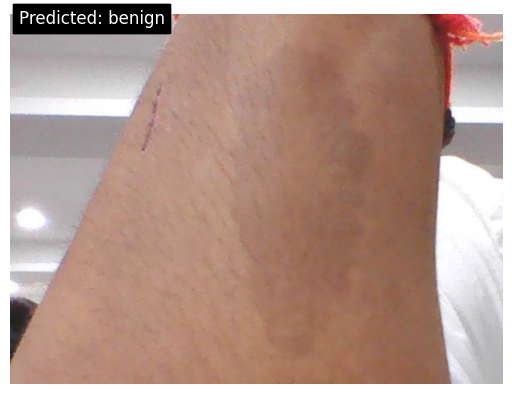

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='Black')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='Black')
plt.show()